## Verisetinin İndirilmesi ve Dosyaların Çıkarılması

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd '/gdrive/My Drive/DeepLearningBootcamp'

/gdrive/My Drive/DeepLearningBootcamp


In [ ]:
!ls

SoundsClassification_Preprocess.ipynb  spectrograms-20221001T190226Z-001.zip
spectroGrams


In [ ]:
!unzip -q spectrograms-20221001T190226Z-001.zip -d ./spectroGrams

In [ ]:
!ls spectroGrams/spectrograms/0

## Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import random
import PIL
import cv2 as cv
import pickle
import math

## Gorsele Genel Bakis

In [ ]:
path_image = "spectroGrams/spectrograms/0/55018-0-0-116.png"

(374, 500, 3)


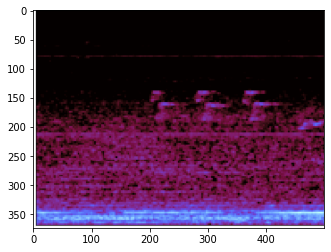

In [ ]:
path_image = "spectroGrams/spectrograms/0/55018-0-0-116.png"
image = cv.imread(path_image, cv.IMREAD_COLOR) # renkli okur
print(image.shape)
plt.imshow(image)
plt.show()

(374, 500)


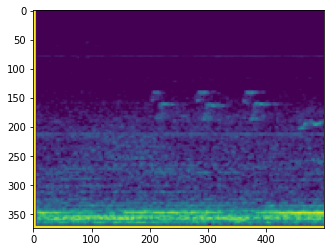

In [ ]:
path_image = "spectroGrams/spectrograms/0/55018-0-0-116.png"
image = cv.imread(path_image, 0) # 0 grayscale okur
print(image.shape)
plt.imshow(image)
plt.show()

(374, 500)


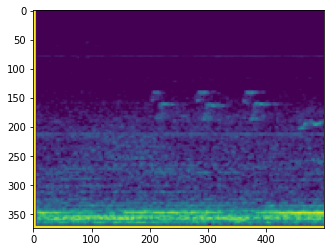

In [ ]:
path_image = "spectroGrams/spectrograms/0/55018-0-0-116.png"
image = cv.imread(path_image, cv.IMREAD_GRAYSCALE) # gray okur
print(image.shape)
plt.imshow(image)
plt.show()

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
image.shape

(374, 500)

## Resizing

In [ ]:
resized = cv.resize(image, (128,128))

In [ ]:
resized.shape

(128, 128)

In [ ]:
type(resized)

numpy.ndarray

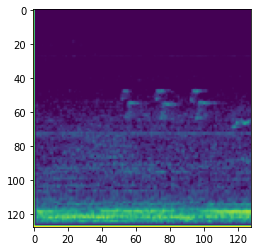

In [ ]:
plt.imshow(resized)
plt.show()

## Preprocess

In [ ]:
path_to_dataset = "spectroGrams/spectrograms/"

In [ ]:
categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [ ]:
def normalize(x):
  x = (x-x.min())/(x.max()-x.min())
  return x

In [ ]:
# MachineLearning bootcamp deep learning projesindekine cok benzedigi icin bu kisimlar ona cok benzerdir
# Error file eger bir hata olursa o bilgilerin yazilmasi icindir.
images = []
errors_file = open("errors.txt", "a")
error = 0 # kac tane error ile karsilasildi
number = 0 # Kac tane gorsel okundugu bilgisi

for category in categories:
  idx = categories.index(category)
  for image in os.listdir(f"{path_to_dataset}/{category}"):
    path_to_image = f"{path_to_dataset}/{category}/{image}"
    try:
      img = cv.imread(path_to_image, cv.IMREAD_GRAYSCALE)
      img = cv.resize(img, (128,128))
      img = normalize(img)
      images.append([img, idx])

    except Exception as e:
      error += 1
      errors_file.write(f"{error}) {e}\n")
    finally:
      number += 1
    print(f"\rProcessed: {number} | Errors: {error}", end="")

errors_file.close()

Processed: 8732 | Errors: 0

In [ ]:
images[0][0].shape

(128, 128)

In [ ]:
print(np.array(images)[:,1])

[0 0 0 ... 9 9 9]


In [ ]:
for _ in range(9): # Kac defa karistirildiginin bir onemi yok ben 9 defa karistirdim.
  random.shuffle(images)

In [ ]:
np.array(images)[:,1]

array([2, 2, 0, ..., 0, 8, 4], dtype=object)

In [ ]:
X = []
y = []
for image, idx in images:
  X.append(image)
  y.append(idx)

In [ ]:
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

In [ ]:
# Float degil de tam sayi degeri alabilmek icin ceil ve floor fonksiyonlari kullanilmistir
x_train_size = math.ceil(len(X) * 0.8)
x_val_size = math.floor(len(X) * 0.1)
x_test_size = math.floor(len(X) * 0.1)

In [ ]:
print(x_train_size, x_val_size, x_test_size)

6986 873 873


In [ ]:
X_train = X[:x_train_size]
y_train = y[:x_train_size]

X_val = X[x_train_size:x_train_size+x_val_size]
y_val = y[x_train_size:x_train_size+x_val_size]

X_test = X[x_train_size+x_val_size:]
y_test = y[x_train_size+x_val_size:]

# x_test_size kullanmamiza gerek kalmadi kalan elemanlar teste atilmis olacak

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

6986
6986
873
873
873
873


In [ ]:
print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)

(128, 128)
(128, 128)
(128, 128)


In [ ]:
# Asagidaki islemler ile veriler pkl uzantili dosyalara yazilmis olur.
with open("X_train.pkl", "wb") as f:
  pickle.dump(X_train, f)  
with open("y_train.pkl", "wb") as f:
  pickle.dump(y_train, f)

with open("X_val.pkl", "wb") as f:
  pickle.dump(X_val, f)  
with open("y_val.pkl", "wb") as f:
  pickle.dump(y_val, f)

with open("X_test.pkl", "wb") as f:
  pickle.dump(X_test, f)  
with open("y_test.pkl", "wb") as f:
  pickle.dump(y_test, f)